In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go

# Data Preprocessing

##EDA with SQL

In [ ]:
dataset = pd.read_csv("BankNote_Authentication.csv")
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Checking for Null Values

In [ ]:
dataset.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## EDA with visual analytics

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



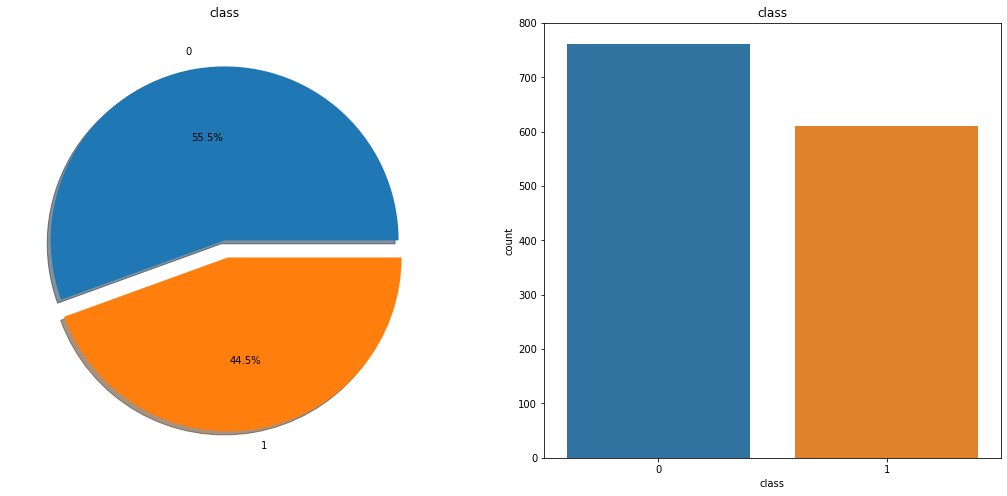

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('class')
ax[0].set_ylabel('')
sns.countplot('class', data=dataset, ax=ax[1])
ax[1].set_title('class')
plt.show()

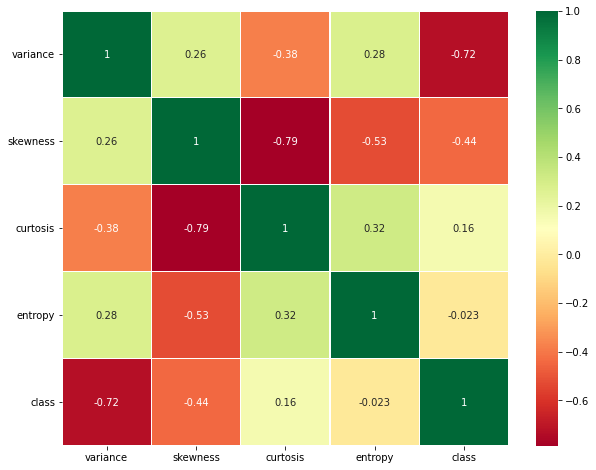

In [ ]:
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

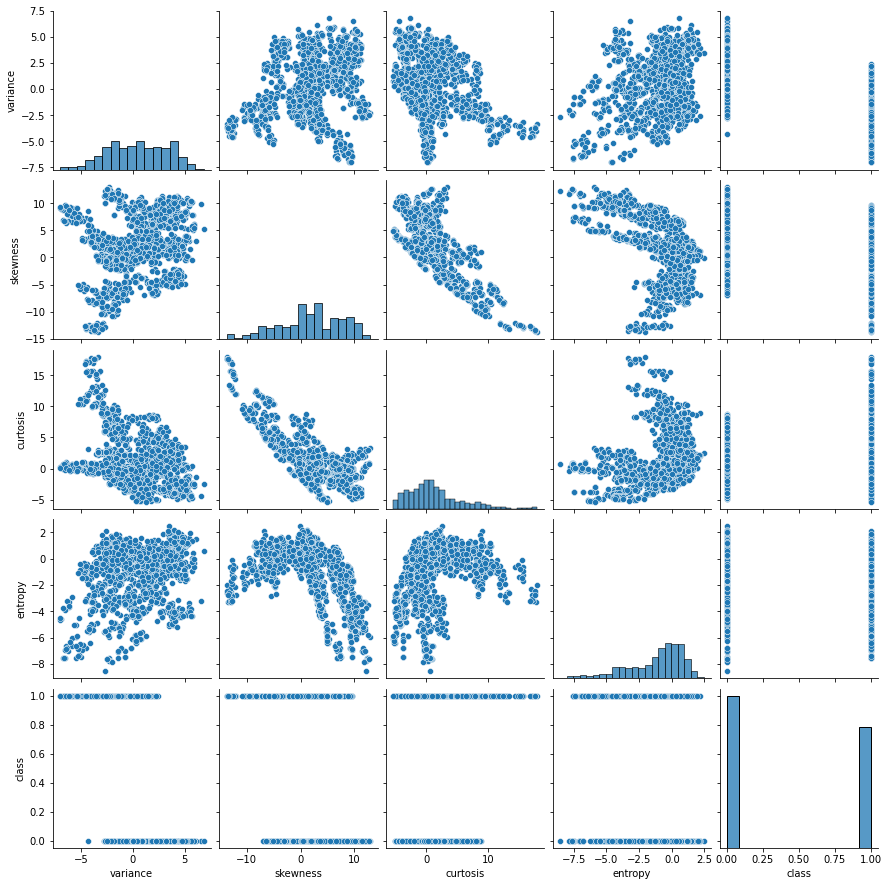

In [ ]:
sns.pairplot(dataset)

## Dealing with Numeric Variables

In [ ]:
num_cols = dataset.columns[:-1]

for col in num_cols:
    col_bin = pd.qcut(dataset[col], q=10)
    
    bin_name = col+"_bin"
    dataset[bin_name] = col_bin
    
dataset.drop(columns=num_cols, axis=1, inplace=True)

In [ ]:
dataset.head()

,class,variance_bin,skewness_bin,curtosis_bin,entropy_bin
0,0,"(3.422, 4.118]","(7.643, 9.435]","(-3.439, -2.245]","(-0.587, -0.206]"
1,0,"(4.118, 6.825]","(7.643, 9.435]","(-3.439, -2.245]","(-1.81, -1.079]"
2,0,"(3.422, 4.118]","(-3.387, -0.378]","(1.416, 2.527]","(-0.206, 0.212]"
3,0,"(3.422, 4.118]","(9.435, 12.952]","(-5.287, -3.439]","(-4.254, -3.028]"
4,0,"(-0.404, 0.496]","(-6.478, -3.387]","(4.564, 7.881]","(-1.079, -0.587]"


## Seperating Dependent Variable

In [ ]:
X = dataset.drop(columns=["class"], axis=1)
y = dataset["class"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in X.columns:
    X[col] = le.fit_transform(X[col])

In [ ]:
X.head()

,variance_bin,skewness_bin,curtosis_bin,entropy_bin
0,8,8,1,5
1,9,8,1,3
2,8,2,6,6
3,8,9,0,1
4,4,1,8,4


# Model

## Splitting Data into Training and Testing set

In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 13 kB/s 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier(),
    CatBoostClassifier()  
    ]

In [ ]:
row_index = 0
MLA_compare = pd.DataFrame()

for classifier in MLA:
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    classifier_accuracy_score = accuracy_score(y_test, y_pred)

    kfold_accuracy = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

    MLA_name = classifier.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'Accuracy Score'] = classifier_accuracy_score*100
    MLA_compare.loc[row_index, 'K-Fold Accuracy'] = kfold_accuracy.mean()*100

    row_index+=1

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Li

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6097453	total: 4.13ms	remaining: 821ms
5:	learn: 0.5948097	total: 5.18ms	remaining: 858ms
6:	learn: 0.5813677	total: 5.97ms	remaining: 847ms
7:	learn: 0.5668832	total: 6.77ms	remaining: 839ms
8:	learn: 0.5534611	total: 7.59ms	remaining: 835ms
9:	learn: 0.5395497	total: 8.49ms	remaining: 841ms
10:	learn: 0.5293988	total: 9.29ms	remaining: 835ms
11:	learn: 0.5173265	total: 10.1ms	remaining: 829ms
12:	learn: 0.5109037	total: 10.7ms	remaining: 815ms
13:	learn: 0.4976626	total: 11.5ms	remaining: 810ms
14:	learn: 0.4844987	total: 12.3ms	remaining: 809ms
15:	learn: 0.4741823	total: 13.1ms	remaining: 804ms
16:	learn: 0.4626221	total: 13.8ms	remaining: 800ms
17:	learn: 0.4549532	total: 14.6ms	remaining: 799ms
18:	learn: 0.4441115	total: 15.4ms	remaining: 797ms
19:	learn: 0.4347815	total: 16.2ms	remaining: 795ms
20:	learn: 0.4265399	total: 17ms	remaining: 793ms
21:	learn: 0.4181837	total: 17.9ms	remaining: 794ms
22:	learn: 0.4086692	

In [ ]:
sorted_MLA_compare = MLA_compare.sort_values(
    by="K-Fold Accuracy",
    ascending=False).reset_index(drop=True).head(15)
sorted_MLA_compare

,MLA Name,Accuracy Score,K-Fold Accuracy
0,GaussianProcessClassifier,100.000000,99.909091
1,SVC,100.000000,99.909091
2,XGBClassifier,99.636364,99.636364
3,AdaBoostClassifier,99.636364,99.545455
4,KNeighborsClassifier,99.272727,99.545455
5,CatBoostClassifier,100.000000,99.454545
6,DecisionTreeClassifier,99.272727,99.362802
7,RandomForestClassifier,99.636364,99.362802
8,GradientBoostingClassifier,99.636364,99.271893
9,ExtraTreesClassifier,99.636364,99.271893


Text(0, 0.5, 'Accuracy Score')

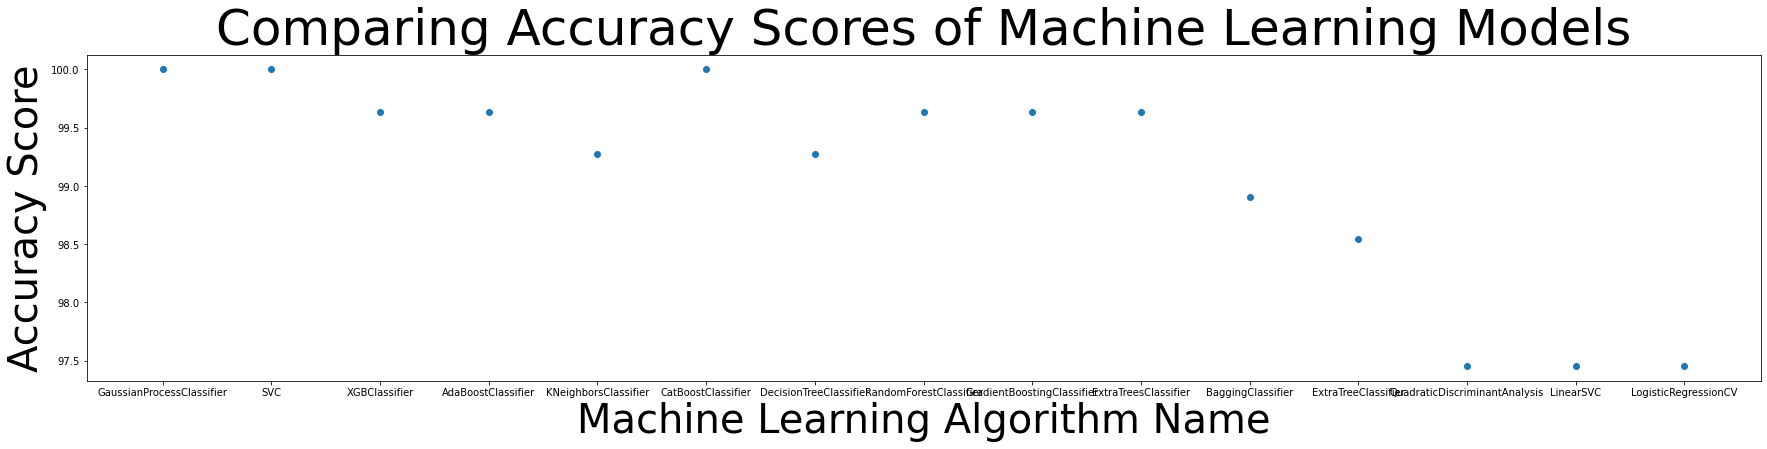

In [ ]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(30, 6))

# scatter the MLA name against the Accuracy Score
ax.scatter(sorted_MLA_compare["MLA Name"],sorted_MLA_compare["Accuracy Score"])
# set a title and labels
ax.set_title('Comparing Accuracy Scores of Machine Learning Models',fontsize = 50)
ax.set_xlabel('Machine Learning Algorithm Name',fontsize = 40)
ax.set_ylabel('Accuracy Score',fontsize = 40)

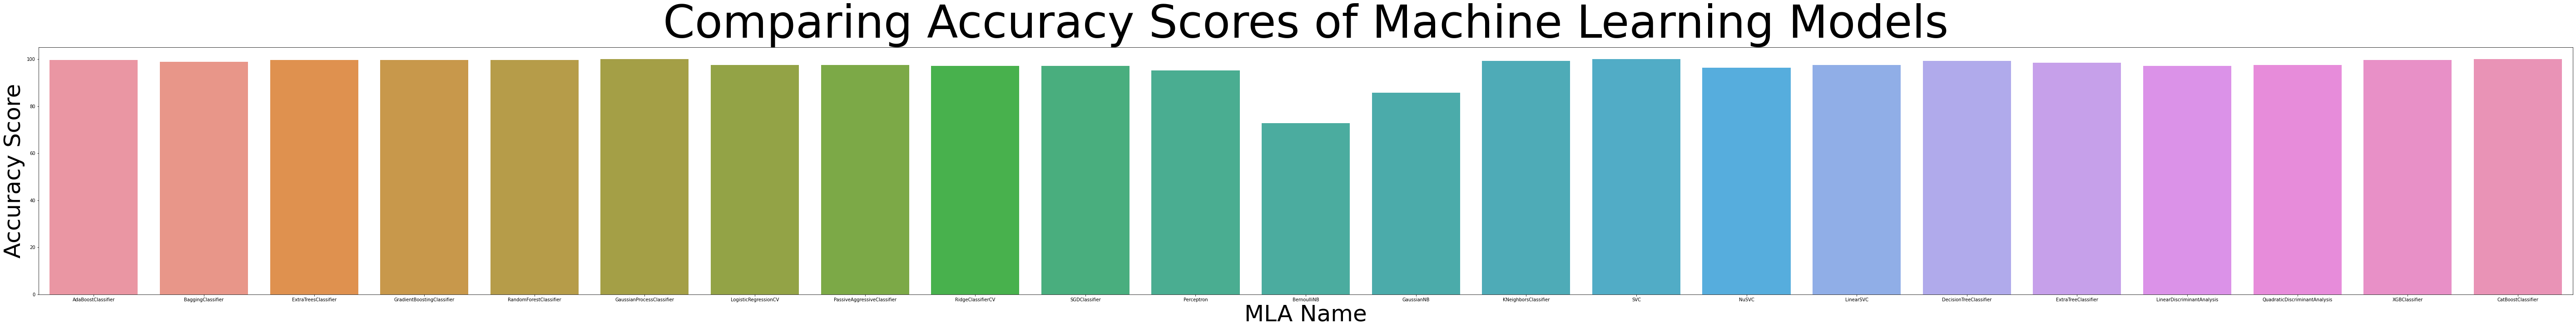

In [ ]:

fig_dims = (100, 10)

fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('Comparing Accuracy Scores of Machine Learning Models',fontsize = 100)
ax.set_xlabel('Machine Learning Algorithm Name',fontsize = 50)
ax.set_ylabel('Accuracy Score',fontsize = 50)
sns.barplot(x = "MLA Name", y = "Accuracy Score", ax=ax, data=MLA_compare)



Text(0, 0.5, 'K-Fold Accuracy')

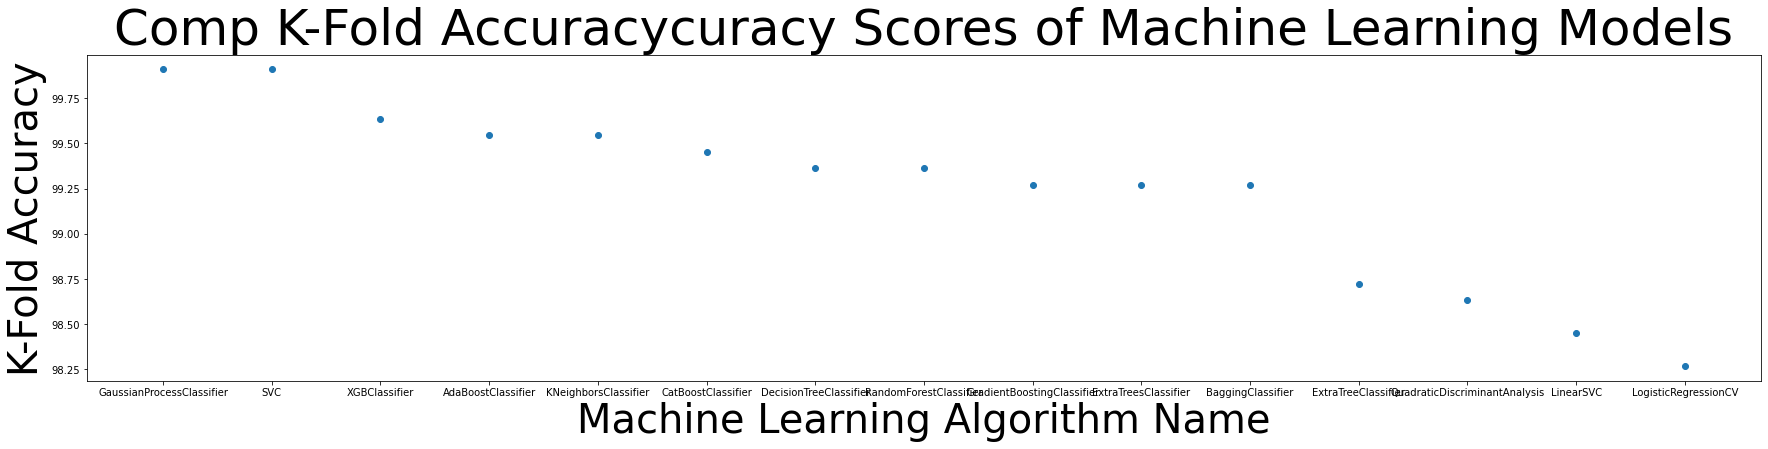

In [ ]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(30, 6))

# scatter the MLA name against the Accuracy Score
ax.scatter(sorted_MLA_compare["MLA Name"],sorted_MLA_compare["K-Fold Accuracy"])
# set a title and labels
ax.set_title('Comp K-Fold Accuracycuracy Scores of Machine Learning Models',fontsize = 50)
ax.set_xlabel('Machine Learning Algorithm Name',fontsize = 40)
ax.set_ylabel('K-Fold Accuracy',fontsize = 40)

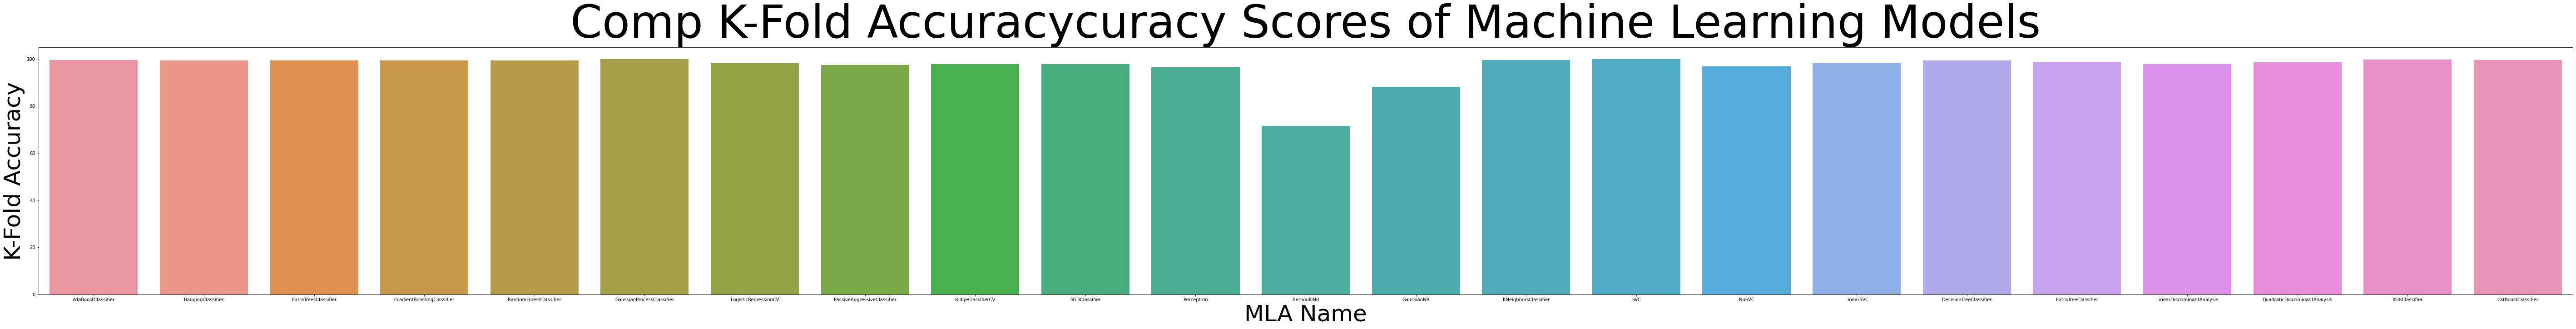

In [ ]:

fig_dims = (100, 10)

fig, ax = plt.subplots(figsize=fig_dims)
ax.set_title('Comp K-Fold Accuracycuracy Scores of Machine Learning Models',fontsize = 100)
ax.set_xlabel('Machine Learning Algorithm Name',fontsize = 50)
ax.set_ylabel('K-Fold Accuracy',fontsize = 50)
sns.barplot(x = "MLA Name", y = "K-Fold Accuracy", ax=ax, data=MLA_compare)

